ValueError: Image size of 14096x89183 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

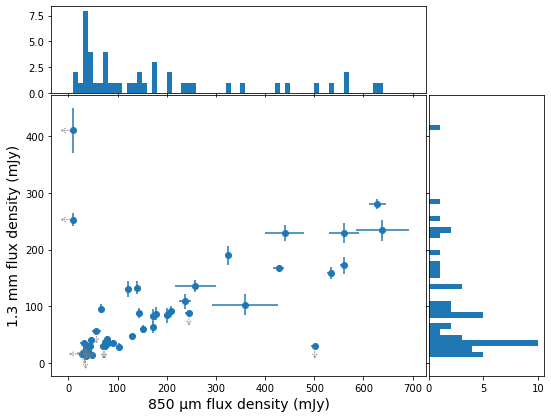

In [2]:
import numpy as np
import matplotlib.pyplot as plt

name = 'Target.txt'

Name, x, d_x, y, d_y = np.loadtxt(name, dtype='str', unpack=True)

u_x = []
u_y = []

for i in range(len(x)):
    if(x[i] == 'None'):
        x[i] = 10.0
        u_x.append(i)
    if(x[i][0] == '<'):
        x[i] = x[i][1:]
        u_x.append(i)
    
    if(y[i] == 'None'):
        y[i] = 30.0
        u_y.append(i)
    if(y[i][0] == '<'):
        y[i] = y[i][1:]
        u_y.append(i)
    
    if(d_x[i] == 'None'):
        d_x[i] = 0
        
    if(d_y[i] == 'None'):
        d_y[i] = 0


X = x.astype(float)
Y = y.astype(float)
d_X = d_x.astype(float)
d_Y = d_y.astype(float)


u_x_x = []
u_x_y = []

for j in range(len(u_x)):
    u_x_x.append(X[u_x[j]])
    u_x_y.append(Y[u_x[j]])

u_x_X = np.array(u_x_x)
u_x_Y = np.array(u_x_y)

for x, y in zip(u_x_X,u_x_Y):
    plt.annotate('', xy=(x, y), xytext=(-15, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<-",ls=':', color='grey', alpha=0.8))

u_y_x = []
u_y_y = []

for j in range(len(u_y)):
    u_y_x.append(X[u_y[j]])
    u_y_y.append(Y[u_y[j]])

u_y_X = np.array(u_y_x)
u_y_Y = np.array(u_y_y)

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    ax.scatter(x, y)
    
    binwidth = 10
    xmax = np.max(np.abs(x))
    ymax = np.max(np.abs(y))
    xlim = (int(xmax/binwidth) + 1) * binwidth
    ylim = (int(ymax/binwidth) + 1) * binwidth

    
    xbins = np.arange(0, xlim + binwidth, binwidth)
    ybins = np.arange(0, ylim + binwidth, binwidth)
    ax_histx.hist(x, bins=xbins)
    ax_histy.hist(y, bins=ybins, orientation='horizontal')


left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(8, 6))


ax = fig.add_axes(rect_scatter)
ax.errorbar(X, Y, xerr=d_X, yerr=d_Y, fmt='.')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('850 \u03BCm flux density (mJy)', size=14)
plt.ylabel('1.3 mm flux density (mJy)', size=14)

ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)


scatter_hist(X, Y, ax, ax_histx, ax_histy)

    
for x, y in zip(u_x_X,u_x_Y):
    ax.annotate('', xy=(x, y), xytext=(-15, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<-", ls=':', color='grey', alpha=0.8))

for x, y in zip(u_y_X,u_y_Y):
    ax.annotate('', xy=(x, y), xytext=(0, -15), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<-", ls=':', color='grey', alpha=0.8))


plt.savefig(name+'.pdf', format='PDF', transparent=True)

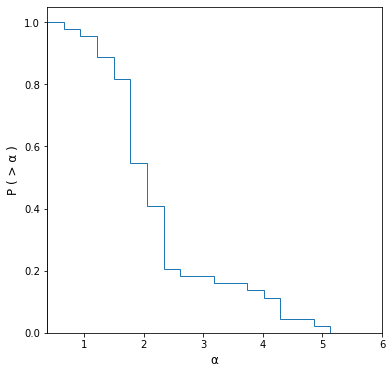

In [4]:
import numpy as np
import matplotlib.pyplot as plt

name = 'Target_a.txt'
x, d_x= np.loadtxt(name, dtype='str', unpack=True)

u_x = []

for i in range(len(x)):
    if(x[i][0] == '<'):
        x[i] = x[i][1:]
        u_x.append(i)

X = x.astype(float)
fig = plt.figure(figsize=(6, 6))
plt.hist(X, bins=int(np.max(X)/0.3), density=True, histtype='step', cumulative=-1)

#plt.legend()
plt.xlim([0.38, 6])
plt.xlabel('\u03B1', size=12)
plt.ylabel('P ( > \u03B1 )', size=12)
plt.savefig(name+'.pdf', format='PDF', transparent=True)

In [ ]:
import numpy as np
from astropy.coordinates import SkyCoord

name = 'targetname.txt'

Name, d_ra, d_dec = np.loadtxt(name, dtype='str', unpack=True)


d_ra = d_ra.astype(float)
d_dec = d_dec.astype(float)


for j in range(len(d_ra)):
    c = SkyCoord(d_ra[j], d_dec[j], frame='icrs', unit='deg')
    print(c.to_string('hmsdms'))